In [20]:
import pandas as pd
import numpy as np
df=pd.read_csv("eth.csv",parse_dates=["date"])
df

,date,open,high,low,close,adjusted_close,volume,dividend_amount,split_coefficient
0,2021-10-06,3515.48,3538.70,3502.80,3517.71,3517.71,11513.0,0.0,1.0
1,2021-10-05,3386.31,3545.00,3363.78,3515.27,3515.27,393900.0,0.0,1.0
2,2021-10-04,3417.73,3437.19,3270.00,3386.31,3386.31,485204.0,0.0,1.0
3,2021-10-03,3387.77,3488.00,3342.51,3417.73,3417.73,360586.0,0.0,1.0
4,2021-10-02,3309.91,3469.00,3257.00,3387.76,3387.76,422551.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...
95,2021-07-03,2153.95,2240.00,2112.01,2226.99,2226.99,569264.0,0.0,1.0
96,2021-07-02,2106.41,2160.00,2018.50,2154.13,2154.13,672282.0,0.0,1.0
97,2021-07-01,2275.68,2275.93,2073.12,2106.41,2106.41,787865.0,0.0,1.0
98,2021-06-30,2165.46,2287.78,2087.99,2275.68,2275.68,910583.0,0.0,1.0


In [21]:
df=df.sort_values("date",ascending=True).reset_index(drop=True)

In [22]:
# import datetime
# df["date"]=pd.to_datetime(df["date"])
# df.index=df.pop('date')

In [23]:
df

,date,open,high,low,close,adjusted_close,volume,dividend_amount,split_coefficient
0,2021-06-29,2084.42,2245.00,2073.57,2165.33,2165.33,831257.0,0.0,1.0
1,2021-06-30,2165.46,2287.78,2087.99,2275.68,2275.68,910583.0,0.0,1.0
2,2021-07-01,2275.68,2275.93,2073.12,2106.41,2106.41,787865.0,0.0,1.0
3,2021-07-02,2106.41,2160.00,2018.50,2154.13,2154.13,672282.0,0.0,1.0
4,2021-07-03,2153.95,2240.00,2112.01,2226.99,2226.99,569264.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...
95,2021-10-02,3309.91,3469.00,3257.00,3387.76,3387.76,422551.0,0.0,1.0
96,2021-10-03,3387.77,3488.00,3342.51,3417.73,3417.73,360586.0,0.0,1.0
97,2021-10-04,3417.73,3437.19,3270.00,3386.31,3386.31,485204.0,0.0,1.0
98,2021-10-05,3386.31,3545.00,3363.78,3515.27,3515.27,393900.0,0.0,1.0


In [24]:
dclose=df[["date","close"]]
# dclose.rename(columns={"date":df})

In [25]:
dclose

,date,close
0,2021-06-29,2165.33
1,2021-06-30,2275.68
2,2021-07-01,2106.41
3,2021-07-02,2154.13
4,2021-07-03,2226.99
...,...,...
95,2021-10-02,3387.76
96,2021-10-03,3417.73
97,2021-10-04,3386.31
98,2021-10-05,3515.27


In [26]:
dclose["dateshift"]=dclose["date"]-dclose["date"].shift()
dclose

/var/folders/bj/r2dj9qf91bv819f05q69y_jc0000gn/T/ipykernel_53946/3327503328.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dclose["dateshift"]=dclose["date"]-dclose["date"].shift()


,date,close,dateshift
0,2021-06-29,2165.33,NaT
1,2021-06-30,2275.68,1 days
2,2021-07-01,2106.41,1 days
3,2021-07-02,2154.13,1 days
4,2021-07-03,2226.99,1 days
...,...,...,...
95,2021-10-02,3387.76,1 days
96,2021-10-03,3417.73,1 days
97,2021-10-04,3386.31,1 days
98,2021-10-05,3515.27,1 days


In [27]:
dclose.drop("dateshift",inplace=True,axis=1)

/Users/krutikasarode/opt/anaconda3/lib/python3.9/site-packages/pandas/core/frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


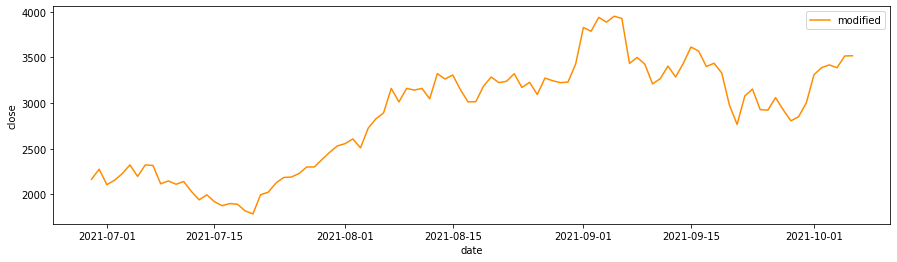

In [28]:
import seaborn as sns # Visualization
import matplotlib.pyplot as plt
f, ax = plt.subplots(figsize=(15,4))

sns.lineplot(x=dclose['date'], y=dclose['close'], color='darkorange', label = 'modified')
plt.show()

In [29]:
from statsmodels.tsa.stattools import adfuller
# meandf.dropna(inplace=True)
#perform augmented Dickey-Fuller test
res=adfuller(dclose["close"])
if res[1]>0.05: print("Data is not stationary pvalue:",res[1])
else: print("Data is stationary")

Data is not stationary pvalue: 0.6666251697155634


In [30]:
dclose["closeLog"]=dclose["close"].apply(lambda x: np.log(x))
res=adfuller(dclose["closeLog"])
if res[1]>0.05: print("Data is not stationary pvalue:",res[1])
else: print("Data is stationary")

Data is not stationary pvalue: 0.6960888447593068


/var/folders/bj/r2dj9qf91bv819f05q69y_jc0000gn/T/ipykernel_53946/1979315563.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dclose["closeLog"]=dclose["close"].apply(lambda x: np.log(x))


In [31]:
dclose.dropna(inplace=True)
dclose["closeDiff"]=dclose["close"]-dclose["close"].shift()
dclose.dropna(inplace=True)

res=adfuller(dclose["closeDiff"])
if res[1]>0.05: print("Data is not stationary pvalue:",res[1])
else: print("Data is stationary")

Data is stationary


/Users/krutikasarode/opt/anaconda3/lib/python3.9/site-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)
/var/folders/bj/r2dj9qf91bv819f05q69y_jc0000gn/T/ipykernel_53946/510333569.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dclose["closeDiff"]=dclose["close"]-dclose["close"].shift()


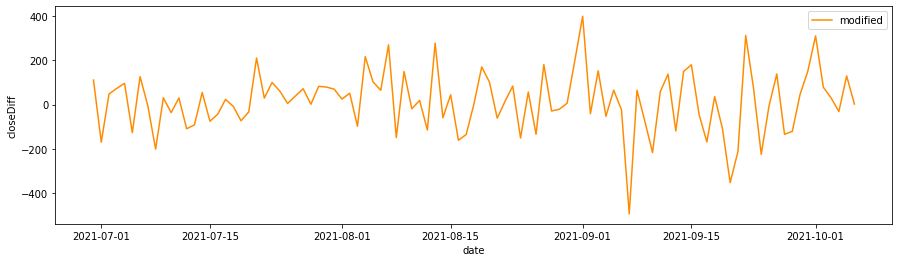

In [32]:
import seaborn as sns # Visualization
import matplotlib.pyplot as plt
f, ax = plt.subplots(figsize=(15,4))

sns.lineplot(x=dclose['date'], y=dclose['closeDiff'], color='darkorange', label = 'modified')
plt.show()

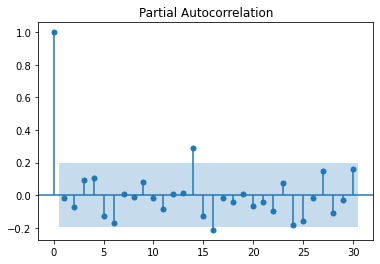

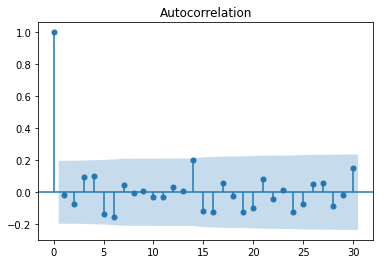

In [33]:
from statsmodels.graphics.tsaplots import plot_pacf, plot_acf
plot_pacf(dclose["closeDiff"], lags=30)
plot_acf(dclose["closeDiff"], lags=30)

plt.show()

In [34]:
train_size = int(0.90 * len(dclose))
test_size = len(dclose) - train_size

univariate_df = dclose[['date','close','closeDiff']].copy()
# univariate_df.columns = ['ds', 'y']
univariate_df.index=univariate_df.pop('date')
train = univariate_df.iloc[:train_size, :]
df.index=df.pop('date')
x_train, y_train = pd.DataFrame(univariate_df.iloc[:train_size, 0]), pd.DataFrame(univariate_df.iloc[:train_size, 1])
x_valid, y_valid = pd.DataFrame(univariate_df.iloc[train_size:, 0]), pd.DataFrame(univariate_df.iloc[train_size:, 1])

print(len(train), len(x_valid))

89 10


In [48]:
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_absolute_error, mean_squared_error
import math
# Fit model
model = ARIMA(x_train, order=(6,0,1))
model_fit = model.fit()

# Prediction with ARIMA
# y_pred, se, conf = model_fit.forecast(15)
y_pred=model_fit.predict(start=1,end=len(x_train)+len(x_valid)-1)
# Calcuate metrics
# print(y_pred)
# print(len(y_pred))
# score_mae = mean_absolute_error(x_valid, y_pred)
# score_rmse = math.sqrt(mean_squared_error(x_valid, y_pred))

# print('RMSE: {}'.format(score_rmse))

/Users/krutikasarode/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            8     M =           12

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.72105D+00    |proj g|=  2.69427D-01

At iterate    5    f=  6.35670D+00    |proj g|=  1.32913D-02

At iterate   10    f=  6.35332D+00    |proj g|=  3.97060D-03

At iterate   15    f=  6.35252D+00    |proj g|=  1.82100D-02

At iterate   20    f=  6.35176D+00    |proj g|=  6.84803D-03

At iterate   25    f=  6.35171D+00    |proj g|=  8.38689D-03



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



At iterate   30    f=  6.35171D+00    |proj g|=  1.42656D-02



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



At iterate   35    f=  6.35169D+00    |proj g|=  1.29745D-02

At iterate   40    f=  6.35168D+00    |proj g|=  5.43467D-03



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8     44    287      5     0     0   1.388D-02   6.352D+00
  F =   6.3516804364097394     

ABNORMAL_TERMINATION_IN_LNSRCH                              


/Users/krutikasarode/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:547: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/Users/krutikasarode/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


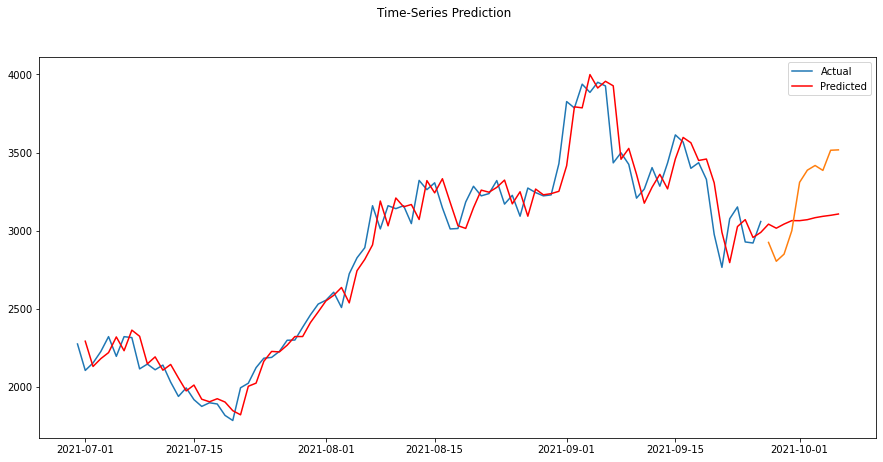

In [49]:
# print(y_train[0:5], y_pred[0:5])
plt.subplots(figsize=(15,7))

# plt.plot(x_train)
plt.plot(train["close"])

plt.plot(y_pred,color="red")
plt.plot(x_valid)
plt.suptitle('Time-Series Prediction')
plt.legend(["Actual","Predicted"])
plt.show()

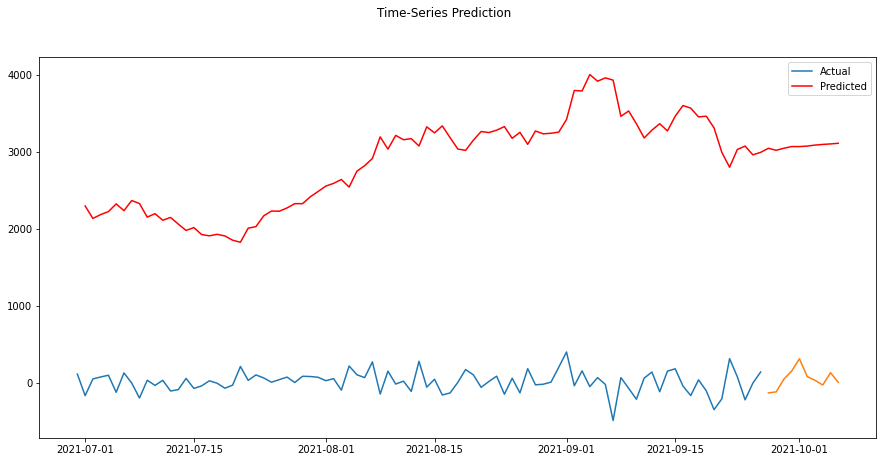

In [43]:
# print(y_train[0:5], y_pred[0:5])
plt.subplots(figsize=(15,7))

# plt.plot(x_train)
plt.plot(train["closeDiff"])

plt.plot(y_pred,color="red")
plt.plot(y_valid)
plt.suptitle('Time-Series Prediction')
plt.legend(["Actual","Predicted"])
plt.show()

In [38]:
print(y_pred[:5])
print(x_train[:5])

2021-07-01    2293.447665
2021-07-02    2128.729795
2021-07-03    2177.156677
2021-07-04    2225.660956
2021-07-05    2321.349168
Freq: D, dtype: float64
              close
date               
2021-06-30  2275.68
2021-07-01  2106.41
2021-07-02  2154.13
2021-07-03  2226.99
2021-07-04  2322.69
